# Seaborn

Seaborn is a high-level library that **makes magic** out of `matplotlib`. Not only does it immediately make old plots *look better* it also allows you to build **complex** plots that would be a nightmare in `matplotlib`

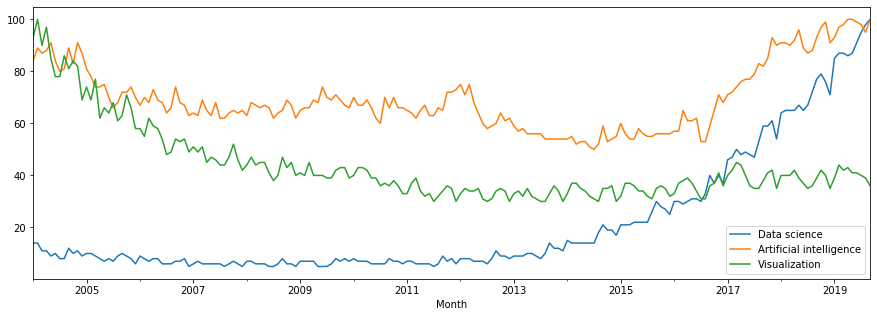

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
df_ds = pd.read_csv('../data/google_search_trends/multiTimeline.csv', skiprows=1,parse_dates=["Month"])
df_ai = pd.read_csv('../data/google_search_trends/multiTimeline-ai.csv', skiprows=1,parse_dates=["Month"])
df_viz = pd.read_csv('../data/google_search_trends/multiTimeline-visualization.csv', skiprows=1,parse_dates=["Month"])

for df in [df_ds, df_ai, df_viz]:
    df.rename(columns={df.columns[-1]:df.columns[-1].replace(": (Worldwide)","")},inplace=True)
    
dfs = df_ds.merge(df_ai, on="Month").merge(df_viz, on="Month")

dfs.plot(x="Month", figsize=(15,5));

## JointPlot

What is this ...

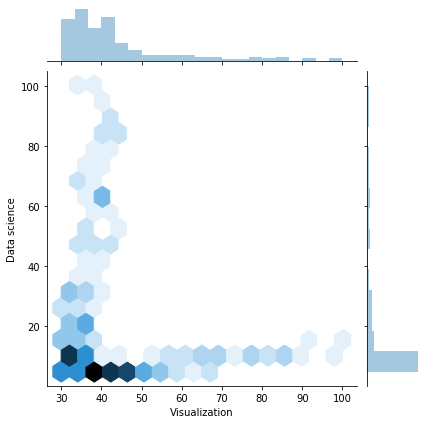

In [53]:
sns.jointplot(x="Visualization",y="Data science", data=dfs, kind="hex");

## Pairplot

All combinations of Jointplots

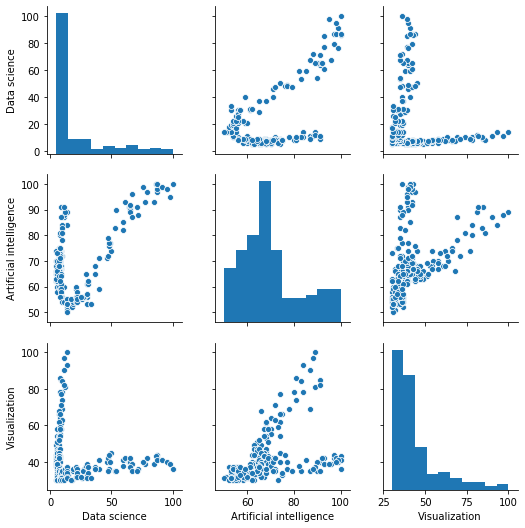

In [52]:
sns.pairplot(dfs);

## FacetGrid

A custom map over the data

## Violin Plot

In [75]:
melted_dfs = dfs.melt(id_vars="Month", var_name="term")
melted_dfs.head()

,Month,term,value
0,2004-01-01,Data science,14
1,2004-02-01,Data science,14
2,2004-03-01,Data science,11
3,2004-04-01,Data science,11
4,2004-05-01,Data science,9


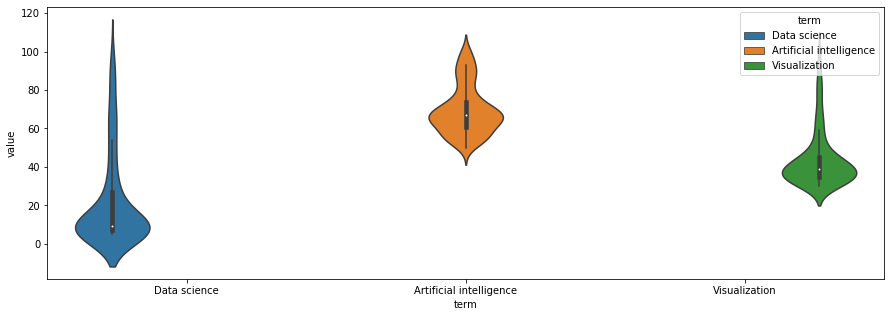

In [76]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(x="term", y="value", hue="term", data=melted_dfs, ax=ax);

## Lineplot

We can easily create lineplots that automagically group data by values and populate visual elements, like error bars.

By setting the `hue`, we tell `seaborn` how to group the data. Setting it to `term` will recover a familiar plot

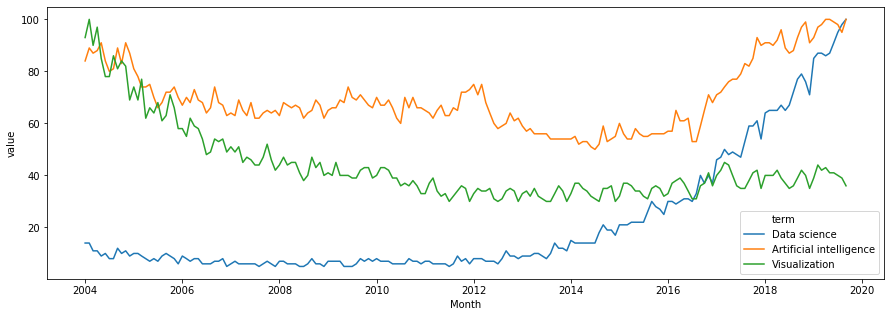

In [80]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=melted_dfs, x='Month', y='value',hue="term", ax=ax);

But we can also combine the datasets by leaving `hue` blank. We default to using the `mean` function to combine, but this can be customized by passing in an `estimator` argument. 

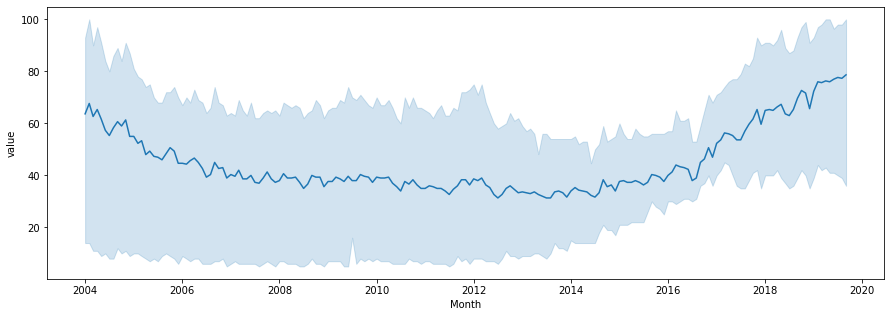

In [82]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=melted_dfs, x='Month', y='value',ax=ax);

# A New Dataset

In [70]:
temperatures = pd.read_csv("../data/global_temperatures/GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])
continents = pd.read_csv("../data/continents.csv")
temperatures = temperatures.merge(continents)
recent = temperatures[temperatures.dt > '2000']
recent.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Code,Continent_Year,Continent
80060,2002-09-01,27.618,0.449,Cape Verde,CPV,2015,Africa
359898,2009-09-01,22.061,0.388,Reunion,REU,2015,Africa
441642,2000-10-01,21.247,0.240,Tunisia,TUN,2015,Africa
405388,2003-06-01,21.204,0.333,South Korea,KOR,2015,Asia
469426,2010-04-01,25.680,0.326,Vietnam,VNM,2015,Asia


# EXERCISE

Use what we've learned so far in Seaborn to analyze a new dataset:

- Create a lineplot to visualize how global temperatures have changed by continent in recent years
- What takeaways are there about this?

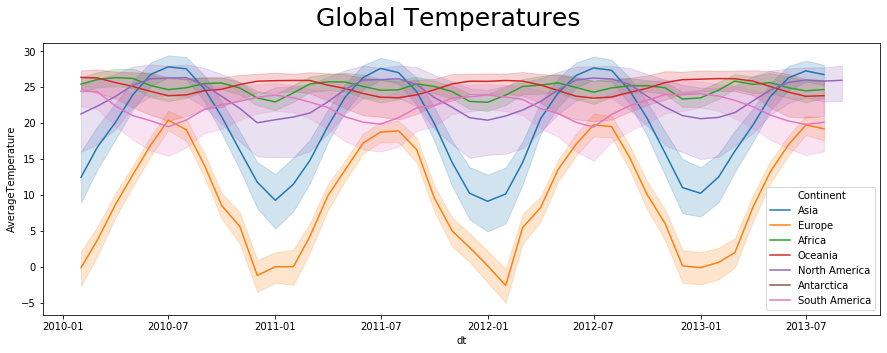

In [83]:
very_recent = recent[recent.dt > '2010']
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Global Temperatures", fontsize=25)
sns.lineplot(data=very_recent, x='dt', y='AverageTemperature', hue="Continent", ax=ax);

# Annotation

We skipped over this in the `matplotlib` section to keep things moving, but let's loop back now. Annotation can include both *regular* text, or *TeX*-style renderings (great for mathematical equations). Let's focus on the regular text.

As with most of these large visualization libraries, check out the docs when you get stuck: https://matplotlib.org/3.1.1/tutorials/text/annotations.html

## Quick Annotation

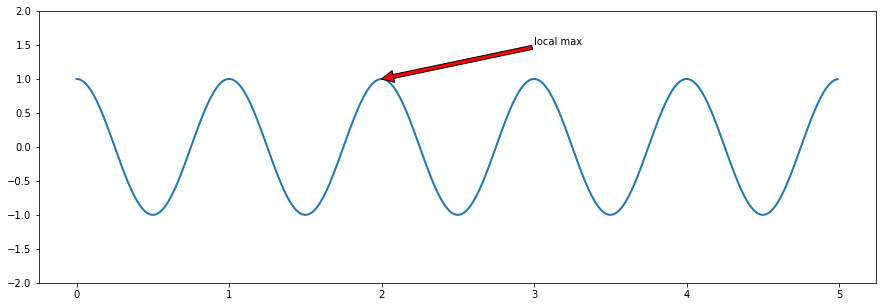

In [125]:
fig, ax = plt.subplots(figsize=(15,5))

t = pd.np.arange(0.0, 5.0, 0.01)
s = pd.np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red'),
            )
ax.set_ylim(-2, 2);

# EXERCISE

- Change the annotation arrow outline to have a red color
- Try and figure this out from the docs: https://matplotlib.org/3.1.1/tutorials/text/annotations.html

- *HINT:* it must be related to `facecolor`, right?

In [123]:
# Solution

fig, ax = plt.subplots(figsize=(15,5))

t = pd.np.arange(0.0, 5.0, 0.01)
s = pd.np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red', edgecolor='red'),
            )
ax.set_ylim(-2, 2);

In [124]:
# Your Solution

fig, ax = plt.subplots(figsize=(15,5))

t = pd.np.arange(0.0, 5.0, 0.01)
s = pd.np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red'),
            )
ax.set_ylim(-2, 2);

# EXERCISE

- Create a violin plot to analyse the "normal climate" of each continent
- Add annotations to the plot to explain your findings

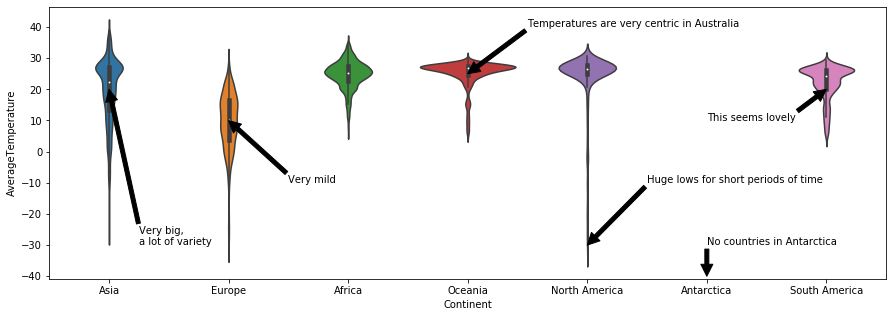

In [144]:
# Solution
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(x="Continent", y="AverageTemperature", data=recent, ax=ax);
ax.annotate("Temperatures are very centric in Australia",
            xy = (3,25),
            xytext = (3.5,40),
           arrowprops=dict(
               facecolor="black"
           ));
ax.annotate("Huge lows for short periods of time",
            xy = (4,-30),
            xytext = (4.5,-10),
           arrowprops=dict(
               facecolor="black"
           ));
ax.annotate("This seems lovely",
            xy = (6,20),
            xytext = (5,10),
           arrowprops=dict(
               facecolor="black"
           ));
ax.annotate("No countries in Antarctica",
            xy = (5,-40),
            xytext = (5,-30),
           arrowprops=dict(
               facecolor="black"
           ));
ax.annotate("Very mild",
            xy = (1,10),
            xytext = (1.5,-10),
           arrowprops=dict(
               facecolor="black"
           ));
ax.annotate("Very big, \na lot of variety",
            xy = (0,20),
            xytext = (0.25,-30),
           arrowprops=dict(
               facecolor="black"
           ));

In [ ]:
# Your Solution